In [1]:
import numpy as np
import pandas as pd
import glob
import os
import random

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
from mlxtend.feature_selection import SequentialFeatureSelector

import seaborn as snx
import xgboost as xgb
random.seed(42)

In [2]:
# import mne
# os.chdir("C:\stern_NEW")
# ch_names = ['Fp1', 'Fz','F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1','Pz', 'P3', 'P7', 'O1', 'Oz', 'O2',
#                'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1',
#                'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6',
#                'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'TP9', 'TP10', 'Cz']
# # picked = ['EEG ' + i for i in ch_names if 'FC' in i] + ['EEG Cz', 'EEG Fz']
# picked = ['EEG ' + i for i in ch_names]

In [3]:
# beh_data = pd.read_csv("all_behavioural_data.csv")

In [4]:
# data_total = pd.DataFrame()
# toi = [2.5, 3.5]
# for setsize in ['3', '15']:
#     for subj in glob.glob('theta_power/*'):
#         d = mne.time_frequency.read_tfrs(subj)[0][setsize]
#         data = pd.DataFrame(d.crop(tmin = toi[0], tmax = None).pick_channels(picked).data.sum(axis = 2).mean(axis = 2))
#         data.columns = ch_names
#         data['target'] = [setsize] * len(data)
#         data['rt'] = list(beh_data[(beh_data['sub'] == int(subj.split('NZ_')[1].split('_epo')[0])) & (beh_data['setSize'] == int(setsize))]['resp.rt_raw'][:len(data)])
#         data['trial'] = np.arange(1, len(d)+1)
#         data_total = pd.concat([data_total, data], axis = 0)

In [5]:
# data_total.to_csv("C:/Users/HP pavilion X360/Desktop/OSDA/big_homework/sternberg_diff_data.csv")

# Sternberg_data

In [39]:
os.chdir("C:/Users/HP pavilion X360/Desktop/OSDA/big_homework/")
data = pd.read_csv('sternberg_diff_data.csv')
data.head()

,Unnamed: 0,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,F6,F2,AF4,AF8,TP9,TP10,Cz,target,rt,trial
0,0,0.000120,0.000249,0.000266,0.000320,0.000147,0.000192,0.000142,0.000087,0.000244,...,0.000184,0.000185,0.000222,0.000307,0.000193,0.000245,0.000213,3,0.520900,1
1,1,0.000077,0.000254,0.000188,0.000246,0.000135,0.000126,0.000168,0.000092,0.000197,...,0.000256,0.000282,0.000277,0.000299,0.000232,0.000291,0.000190,3,0.496360,2
2,2,0.000110,0.000139,0.000242,0.000183,0.000104,0.000101,0.000180,0.000082,0.000126,...,0.000230,0.000304,0.000249,0.000423,0.000222,0.000193,0.000248,3,0.559581,3
3,3,0.000166,0.000274,0.000200,0.000235,0.000139,0.000087,0.000107,0.000096,0.000152,...,0.000290,0.000294,0.000244,0.000594,0.000291,0.000264,0.000160,3,0.462914,4
4,4,0.000105,0.000187,0.000176,0.000260,0.000093,0.000105,0.000102,0.000060,0.000146,...,0.000327,0.000276,0.000220,0.000494,0.000238,0.000189,0.000136,3,0.514266,5


In [40]:
data_3 = data[data.target == 3][:len(data[data.target ==15])]
data_3_15 = pd.concat([data_3, data[data.target ==15]], axis = 0)

In [41]:
y = data_3_15['target']
y = 1*(y==15).values
data_3_15.drop(['Unnamed: 0', 'target', 'trial'], axis = 1, inplace = True)
X = data_3_15

In [42]:
X

,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,CP5,...,FC4,FT8,F6,F2,AF4,AF8,TP9,TP10,Cz,rt
0,0.000120,0.000249,0.000266,0.000320,0.000147,0.000192,0.000142,0.000087,0.000244,0.000116,...,0.000226,0.000054,0.000184,0.000185,0.000222,0.000307,0.000193,0.000245,0.000213,0.520900
1,0.000077,0.000254,0.000188,0.000246,0.000135,0.000126,0.000168,0.000092,0.000197,0.000109,...,0.000144,0.000152,0.000256,0.000282,0.000277,0.000299,0.000232,0.000291,0.000190,0.496360
2,0.000110,0.000139,0.000242,0.000183,0.000104,0.000101,0.000180,0.000082,0.000126,0.000086,...,0.000224,0.000130,0.000230,0.000304,0.000249,0.000423,0.000222,0.000193,0.000248,0.559581
3,0.000166,0.000274,0.000200,0.000235,0.000139,0.000087,0.000107,0.000096,0.000152,0.000086,...,0.000192,0.000084,0.000290,0.000294,0.000244,0.000594,0.000291,0.000264,0.000160,0.462914
4,0.000105,0.000187,0.000176,0.000260,0.000093,0.000105,0.000102,0.000060,0.000146,0.000107,...,0.000284,0.000105,0.000327,0.000276,0.000220,0.000494,0.000238,0.000189,0.000136,0.514266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,0.000396,0.000332,0.000373,0.000160,0.000127,0.000066,0.000146,0.000117,0.000169,0.000170,...,0.000125,0.000066,0.000046,0.000074,0.000097,0.000081,0.000157,0.000106,0.000279,0.601645
2608,0.000532,0.000341,0.000357,0.000161,0.000146,0.000065,0.000164,0.000091,0.000161,0.000173,...,0.000153,0.000073,0.000059,0.000082,0.000078,0.000084,0.000188,0.000089,0.000283,1.384813
2609,0.000206,0.000229,0.000160,0.000142,0.000110,0.000070,0.000131,0.000090,0.000163,0.000155,...,0.000138,0.000062,0.000055,0.000072,0.000077,0.000064,0.000151,0.000095,0.000219,1.055940
2610,0.000251,0.000269,0.000233,0.000100,0.000085,0.000073,0.000144,0.000098,0.000141,0.000175,...,0.000119,0.000056,0.000054,0.000081,0.000088,0.000059,0.000148,0.000096,0.000248,0.856253


In [43]:
# data_3_15.to_csv("stern_data_3_15.csv")

In [44]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size = 0.3)

In [45]:
stsc = StandardScaler()
stsc.fit(X_train)
train = pd.DataFrame(stsc.transform(X_train))
test = pd.DataFrame(stsc.transform(X_test))

In [46]:
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', subsample=None).fit(train)
new_train = pd.DataFrame(kbins.transform(train), columns = X.columns)
new_test = pd.DataFrame(kbins.transform(test), columns = X.columns)

In [47]:
ohe = OneHotEncoder(drop = 'first').fit(new_train)
ohe_train = ohe.transform(new_train)
ohe_test = ohe.transform(new_test)

In [48]:
ohe_train.shape

(1391, 195)

In [49]:
columns = [i + ' ' + 'q' + str(j) for i in data_3_15.columns for j in [2,3,4]]

In [50]:
ohe_train.toarray().shape, ohe_test.toarray().shape

((1391, 195), (597, 195))

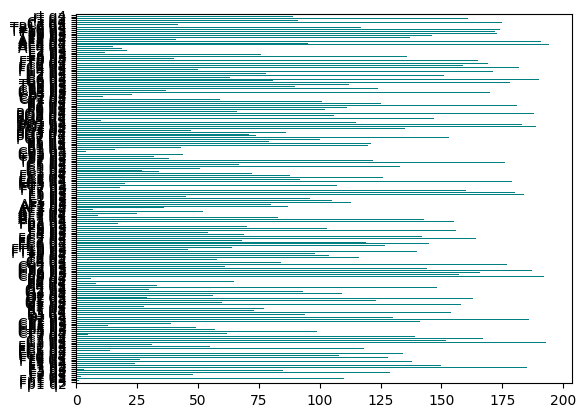

In [51]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(ohe_train.toarray(), y_train)

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks, columns)
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [52]:
(feature_importances[feature_importances > 100]).sort_values(ascending = False)

AF4 q3    194
C3 q2     193
P8 q4     192
AF8 q2    191
C6 q3     190
         ... 
F1 q2     105
T8 q3     104
F8 q2     103
P6 q2     102
P2 q3     101
Length: 94, dtype: int32

In [53]:
ohe_train.toarray()[:, (feature_importances > 100).values].shape

(1391, 94)

In [54]:
# train[train.columns[66:]]
# train.columns[66:]


In [37]:
# one_hot_encoded_data = pd.get_dummies(train, columns = df.columns[66:])
# one_hot_encoded_data
# one_hot_encoded_data['target'] = list(y)
# one_hot_encoded_data
# one_hot_encoded_data.to_csv('one_hot_encoded_sternberg_data.csv')

In [55]:
ohe_train_sel = ohe_train[:, feature_importances>100].toarray().astype(int)
ohe_test_sel = ohe_test[:, feature_importances>100].toarray().astype(int)

## 1. KNN

Best params: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}


<Axes: >

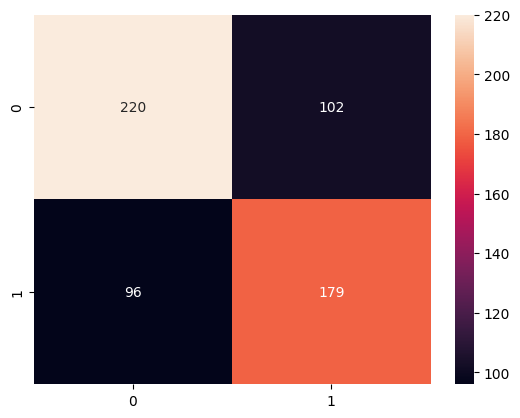

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(X), y*1, test_size = 0.3)

knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1, 30, 1), 'metric': ('euclidean', 'manhattan'),
             'weights':('uniform', 'distance')}
grid = GridSearchCV(knn, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
knn_pred = KNeighborsClassifier(metric = grid.best_params_['metric'], n_neighbors = grid.best_params_['n_neighbors'],
                               weights = grid.best_params_['weights'])
knn_pred.fit(ohe_train_sel, y_train)

y_pred = knn_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [57]:
print(f'Accuracy: {metrics.accuracy_score(y_pred = y_pred, y_true = y_test)}')
print(f'precision: {metrics.precision_score(y_pred = y_pred, y_true = y_test)}')
print(f'recall: {metrics.recall_score(y_pred = y_pred, y_true = y_test)}')
print(f'f1: {metrics.f1_score(y_pred = y_pred, y_true = y_test)}')

Accuracy: 0.6683417085427136
precision: 0.6509090909090909
recall: 0.6370106761565836
f1: 0.6438848920863308


## 2. Logistic Regression

Best params: {'C': 1.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


<Axes: >

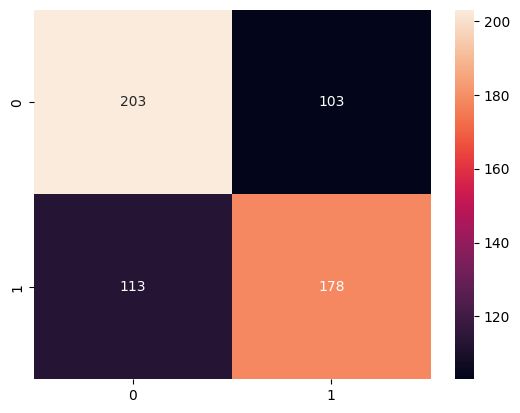

In [58]:
lr = LogisticRegression(max_iter = 10000, random_state = 42)
parameters = {'C':np.arange(0.1, 10, 1), 'penalty': ('l2', 'l1'),
             'class_weight': ['balanced'],
             'solver' : ['saga', 'liblinear']}
grid = GridSearchCV(lr, parameters, cv = 4, n_jobs = -2)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
    
lr_pred = LogisticRegression(C = grid.best_params_['C'], penalty = grid.best_params_['penalty'],
                               class_weight = grid.best_params_['class_weight'],
                            solver = grid.best_params_['solver'])
lr_pred.fit(ohe_train_sel, y_train)

y_pred = lr_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [38]:
# bfs = SequentialFeatureSelector(lr_pred, k_features='best', forward = False, n_jobs=-1)
# bfs.fit(ohe_train.toarray(), y_train)
# features = list(bfs.k_feature_names_)
# features = list(map(int, features))
# lr_pred.fit(ohe_train.toarray()[:, features], y_train)
# y_pred = lr_pred.predict(ohe_test.toarray()[:, features])

In [40]:
# ohe_train.toarray()[:, features].shape

In [43]:
# lr.fit(ohe_train[:, feature_importances>100], y_train)
# y_pred = lr.predict(ohe_train[:, feature_importances>100])

In [59]:
print(f'Logistic Regression accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Logistic Regression precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Logistic Regression recall: {metrics.recall_score(y_test, y_pred)}')
print(f'Logistic Regression f1: {f1_score(y_test, y_pred)}')

Logistic Regression accuracy: 0.6381909547738693
Logistic Regression precision: 0.6116838487972509
Logistic Regression recall: 0.6334519572953736
Logistic Regression f1: 0.6223776223776224


## 3.a XGBoost

In [60]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=500,class_sep=0.7)

data_dmatrix = xgb.DMatrix(data=ohe_train_sel,label=pd.DataFrame(y_train))
params = {'objective':'binary:logistic','eval_metric':'logloss',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'logloss',seed=42) 
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.691704,0.000627,0.693208,0.002089
1,0.690616,0.000645,0.692538,0.002147
2,0.689490,0.000659,0.691850,0.002329
3,0.688585,0.000578,0.691065,0.002571
4,0.687647,0.000499,0.690443,0.002401
5,0.687119,0.000533,0.690140,0.002505
6,0.686073,0.000565,0.689313,0.002340
7,0.685154,0.000595,0.688666,0.002491
8,0.684252,0.000761,0.688102,0.002257
9,0.683607,0.000706,0.687780,0.002516


In [61]:
grid = pd.DataFrame({'eta':[0.01,0.05,0.1]*3,
'subsample':np.repeat([0.1,0.3, .5],3)})

In [62]:
def fit(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'logloss',
              'eta':x[0],
              'subsample':x[1]}
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, 
    nfold=4, metrics = 'logloss',seed=42)
    return xgb_cv[-1:].values[0]

grid[['train-logloss-mean','train-logloss-std',
'test-logloss-mean','test-logloss-std']] = grid.apply(fit,axis=1,result_type='expand')
grid

C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\1369616048.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'eta':x[0],
C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\1369616048.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'subsample':x[1]}


,eta,subsample,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.01,0.1,0.685138,0.001475,0.689647,0.002556
1,0.05,0.1,0.660427,0.004627,0.675407,0.002795
2,0.10,0.1,0.640482,0.006140,0.666613,0.004473
3,0.01,0.3,0.675755,0.001654,0.684813,0.002117
4,0.05,0.3,0.621192,0.002901,0.658239,0.004772
5,0.10,0.3,0.574889,0.003897,0.641546,0.004360
6,0.01,0.5,0.671706,0.001210,0.684482,0.001622
7,0.05,0.5,0.604069,0.003731,0.655276,0.004181
8,0.10,0.5,0.544795,0.006602,0.637693,0.003471


In [63]:
xgb_reg = xgb.XGBRegressor(objective='binary:logistic',
                           eval_metric = 'logloss',
                           eta = 0.01,
                           subsample = 0.1)

xgb_reg.fit(ohe_train_sel, y_train)
y_pred = xgb_reg.predict(ohe_test_sel) > .43

In [64]:
print(f'NB accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'NB precision: {metrics.precision_score(y_test, y_pred)}')
print(f'NB recall: {metrics.recall_score(y_test, y_pred)}')
print(f'NB f1: {f1_score(y_test, y_pred)}')

NB accuracy: 0.5510887772194305
NB precision: 0.5125725338491296
NB recall: 0.9430604982206405
NB f1: 0.6641604010025063


## 4. Random Forest

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 8}


<Axes: >

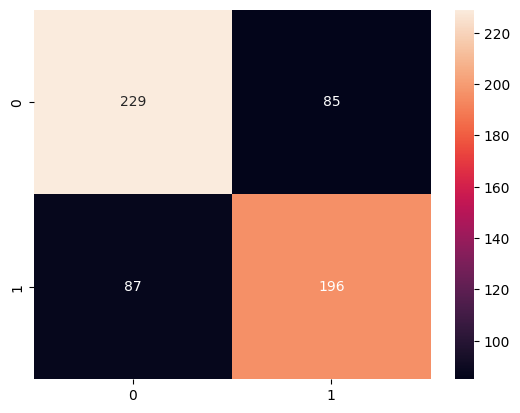

In [65]:
rfc = RandomForestClassifier(random_state = 42, n_jobs = -2)
parameters = {'max_depth':np.arange(3, 30, 5),
             'criterion':['gini', 'entropy'], 'min_samples_split': np.arange(3, 30, 5),
             'class_weight':['balanced', 'balanced_subsample']}
grid = GridSearchCV(rfc, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
rfc_pred = RandomForestClassifier(random_state = 42, max_depth = grid.best_params_['max_depth'],
                                 criterion = grid.best_params_['criterion'],
                                 min_samples_split = grid.best_params_['min_samples_split'],
                                 class_weight = grid.best_params_['class_weight'])
rfc_pred.fit(ohe_train_sel, y_train)
y_pred = rfc_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [66]:
y_pred = rfc_pred.predict(ohe_test_sel)
print(f'RFT accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'RFT precision: {metrics.precision_score(y_test, y_pred)}')
print(f'RFT recall: {metrics.recall_score(y_test, y_pred)}')
print(f'RFT f1: {f1_score(y_test, y_pred)}')

RFT accuracy: 0.711892797319933
RFT precision: 0.6925795053003534
RFT recall: 0.697508896797153
RFT f1: 0.6950354609929078


## 6. FCALC

In [67]:
best_params = dict()
kf = KFold(n_splits=4, shuffle = True, random_state=42)
for train, test in kf.split(ohe_train_sel):
    for alpha in np.arange(0, 10, 3):
        if str(alpha) not in list(best_params.keys()):
            best_params[str(alpha)]=[]
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel[train],
                                                             y_train.astype(int)[train], method = 'standard', alpha = alpha)
        # bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train.toarray()[train], y_train[train], method = 'standard')
        bin_cls.predict(ohe_train_sel[test])
        f1 = f1_score(y_train.astype(int)[test], bin_cls.predictions, average = None)
        best_params[str(alpha)].append(f1)

print(best_params)

{'0': [array([0.595    , 0.4527027]), array([0.        , 0.54822335, 0.40666667]), array([0.        , 0.63861386, 0.49134948]), array([0.        , 0.61538462, 0.46206897])], '3': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])], '6': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])], '9': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]}


In [71]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel, y_train, method = 'standard', alpha = 0)
bin_cls.predict(ohe_test_sel)

In [72]:
y_pred = bin_cls.predictions

<Axes: >

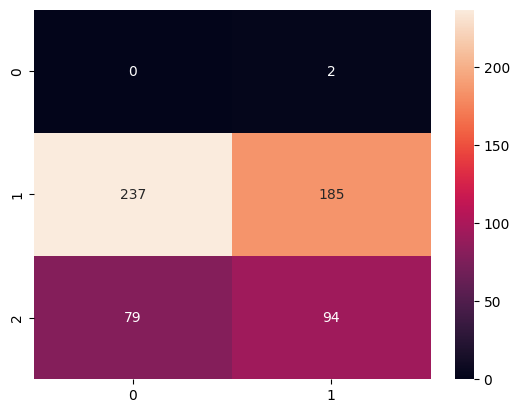

In [73]:
contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [74]:
# ind = np.where(bin_cls.predictions != -1)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = None))

0.5544388609715243
[0.         0.64227642 0.41409692]


## Pattern Structure

In [77]:
best_params = dict()
kf = KFold(n_splits=4, shuffle = True, random_state=42)
for train, test in kf.split(ohe_train_sel):
    pat_cls = fcalc.classifier.PatternBinaryClassifier(ohe_train_sel[train], y_train[train],
                                                       categorical=np.arange(ohe_train_sel.shape[1]))
    pat_cls.predict(ohe_train_sel[test])
    f1 = f1_score(y_train.astype(int)[test], pat_cls.predictions, average = None)
    print(f1)
    # best_params[str(alpha)].append(f1)

print(best_params)

[0.46043165 0.64114833]
[0.         0.50165017 0.6122449 ]
[0.49134948 0.63882064]
[0.37984496 0.63302752]
{}


In [78]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(ohe_train_sel, y_train, categorical=np.arange(ohe_train_sel.shape[1]))
pat_cls.predict(ohe_test_sel)

In [79]:
# ohe_test[:, feature_importances>100].toarray().shape

In [80]:
y_pred = pat_cls.predictions
# y_pred.shape, y_test.shape

<Axes: >

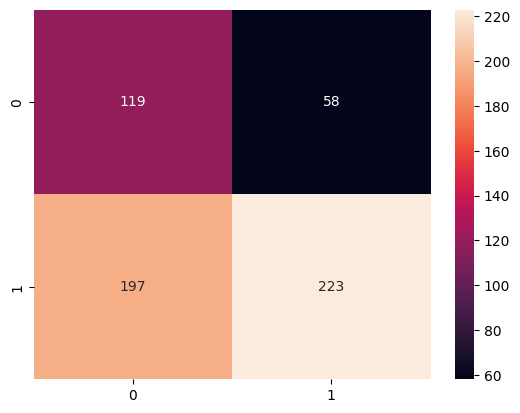

In [81]:
y_pred = pat_cls.predictions
contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [82]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5728643216080402
0.6362339514978602


# SC_data

In [142]:
os.chdir("C:/Users/HP pavilion X360/Desktop/OSDA/big_homework")

In [143]:
data = pd.read_csv('data_sc_for_osda.csv')
data.head(3)

,Unnamed: 0,MEG2142,MEG2132,MEG2122,MEG1932,MEG2332,MEG2542,MEG1742,MEG1732,MEG2512,MEG1922,MEG2342,MEG2112,target
0,1,0.093108,-0.223414,-1.059883,-1.720365,0.702428,2.855179,-1.282480,1.611961,-0.205705,0.772891,1.830294,2.291408,0
1,2,-0.502069,-1.102283,1.077575,1.148038,-1.324281,-0.290751,-1.964517,-0.725845,-1.492331,-1.904653,-2.612012,-1.997749,0
2,3,1.747480,0.266660,2.695567,0.781695,1.184406,0.730803,0.437738,-1.454192,0.330962,-0.364799,-0.007068,1.079166,0


In [144]:
y = data.target
data.drop(['Unnamed: 0', 'target'], axis = 1, inplace = True)
X = data

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3)

In [146]:
stsc = StandardScaler()
stsc.fit(X_train)
train = pd.DataFrame(stsc.transform(X_train))
test = pd.DataFrame(stsc.transform(X_test))

In [147]:
kbins = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile', subsample=None).fit(train)
new_train = pd.DataFrame(kbins.transform(train), columns = X.columns)
new_test = pd.DataFrame(kbins.transform(test), columns = X.columns)

In [148]:
ohe = OneHotEncoder(drop = 'first').fit(new_train)
ohe_train = ohe.transform(new_train)
ohe_test = ohe.transform(new_test)

In [149]:
ohe_test.toarray(), ohe_train.toarray()

(array([[0., 0., 1., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [150]:
columns = [i + ' ' + 'q' + str(j) for i in X.columns for j in [2,3,4,5,6]]
len(columns)
# columns

60

In [122]:
# data = pd.read_csv('data_sc_for_osda.csv')

In [265]:
# data.drop('Unnamed: 0', axis = 1, inplace = True)
# y = data.target
# data.drop('target', axis = 1, inplace = True)
# stsc = StandardScaler()
# stsc.fit(data)
# data = pd.DataFrame(stsc.transform(data))

In [266]:
# label_encoder = LabelEncoder()
# n_bins = 5
# data = pd.DataFrame(data)
# df= pd.DataFrame()
# for i in range(len(data.columns)):
#     df[i] = label_encoder.fit_transform(pd.cut(data[i], n_bins, retbins=True)[0])
# # df = label_encoder.fit_transform(pd.cut(data[0], n_bins, retbins=True)[0])

In [267]:
# one_hot_encoded_data = pd.get_dummies(df, columns = df.columns)
# one_hot_encoded_data
# one_hot_encoded_data['target'] = y
# one_hot_encoded_data.to_csv('one_hot_encoded_sc_data.csv')

In [268]:
# X = pd.read_csv('one_hot_encoded_sc_data.csv')
# y = X['target']
# X.drop('target', axis = 1, inplace = True)
# X_train, X_test, y_train, y_test = train_test_split(np.array(X), y*1, test_size = 0.3)


In [151]:
ohe_train.shape

(1349, 60)

In [152]:
ohe_train.shape, y_train.shape,len(columns)

((1349, 60), (1349,), 60)

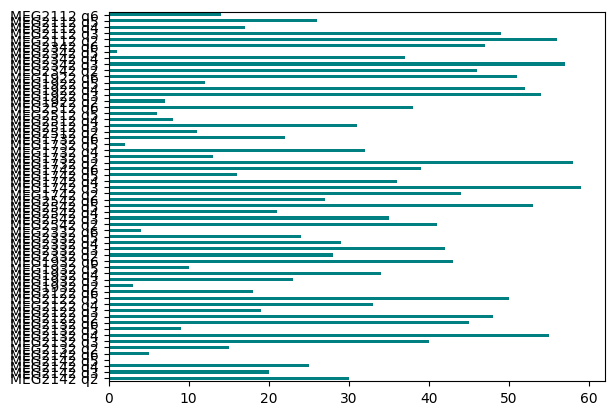

In [153]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(ohe_train.toarray(), y_train)

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks, columns)
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [154]:
len((feature_importances[feature_importances > 15]).sort_values(ascending = False))

44

In [116]:
# from sklearn.metrics import accuracy_score, f1_score

# indx = np.where(bin_cls.predictions != -1)[0]
# print(accuracy_score(y_test.values[indx], bin_cls.predictions[indx]))
# print(f1_score(y_test.values[indx], bin_cls.predictions[indx]))

In [155]:
ohe_train_sel = ohe_train[:, feature_importances>15].toarray().astype(int)
ohe_test_sel = ohe_test[:, feature_importances>15].toarray().astype(int)

## 1. KNN

Best params: {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}


<Axes: >

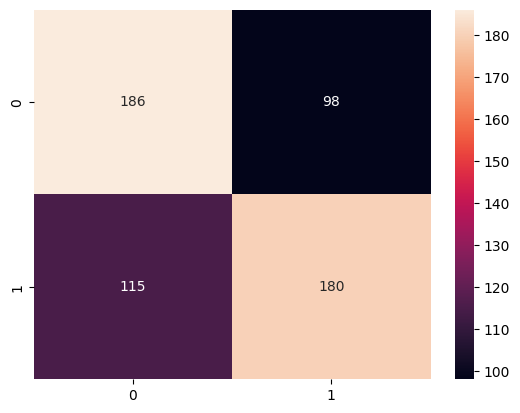

In [156]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1, 30, 1), 'metric': ('euclidean', 'manhattan'),
             'weights':('uniform', 'distance')}
grid = GridSearchCV(knn, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
knn_pred = KNeighborsClassifier(metric = grid.best_params_['metric'], n_neighbors = grid.best_params_['n_neighbors'],
                               weights = grid.best_params_['weights'])
knn_pred.fit(ohe_train_sel, y_train)

y_pred = knn_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [157]:
print(f'Accuracy: {metrics.accuracy_score(y_pred = y_pred, y_true = y_test)}')
print(f'Precision: {metrics.precision_score(y_pred = y_pred, y_true = y_test)}')
print(f'recall: {metrics.recall_score(y_pred = y_pred, y_true = y_test)}')
print(f'f1: {metrics.f1_score(y_pred = y_pred, y_true = y_test)}')

Accuracy: 0.6321243523316062
Precision: 0.6101694915254238
recall: 0.6474820143884892
f1: 0.6282722513089004


## 2. Logistic Regression

Best params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}


<Axes: >

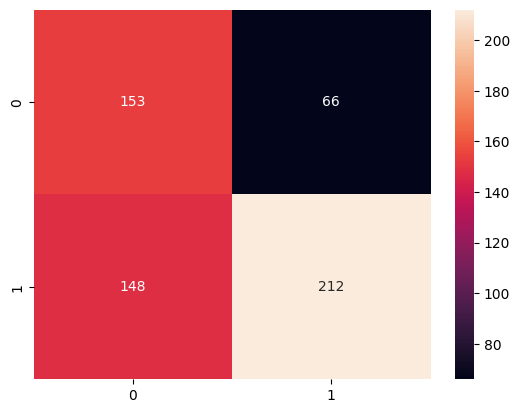

In [158]:
lr = LogisticRegression(max_iter = 100000, random_state = 42)
parameters = {'C':np.arange(0.1, 10, 1), 'penalty': ('l2', 'l1'),
             'class_weight': ['balanced'],
             'solver' : ['saga', 'liblinear']}
grid = GridSearchCV(lr, parameters, cv = 4,  n_jobs = -2)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
    
lr_pred = LogisticRegression(C = grid.best_params_['C'], penalty = grid.best_params_['penalty'],
                               class_weight = grid.best_params_['class_weight'],
                            solver = grid.best_params_['solver'])
lr_pred.fit(ohe_train_sel, y_train)

y_pred = lr_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [159]:
print(f'Logistic Regression accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Logistic Regression precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Logistic Regression recall: {metrics.recall_score(y_test, y_pred)}')
print(f'Logistic Regression f1: {f1_score(y_test, y_pred)}')

Logistic Regression accuracy: 0.6303972366148531
Logistic Regression precision: 0.5888888888888889
Logistic Regression recall: 0.762589928057554
Logistic Regression f1: 0.664576802507837


In [102]:
# bfs = SequentialFeatureSelector(lr_pred, k_features='best', forward = False, n_jobs=-1)
# bfs.fit(ohe_train.toarray(), y_train)
# features = list(bfs.k_feature_names_)
# features = list(map(int, features))
# lr_pred.fit(ohe_train.toarray()[:, features], y_train)
# y_pred = lr_pred.predict(ohe_test.toarray()[:, features])

In [133]:
# print(f'Logistic Regression accuracy: {metrics.accuracy_score(y_test, y_pred)}')
# print(f'Logistic Regression precision: {metrics.precision_score(y_test, y_pred)}')
# print(f'Logistic Regression recall: {metrics.recall_score(y_test, y_pred)}')
# print(f'Logistic Regression f1: {f1_score(y_test, y_pred)}')

## 3.a XGBoost

In [160]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=500,class_sep=0.7)

data_dmatrix = xgb.DMatrix(data=ohe_train_sel,label=y_train)
params = {'objective':'binary:logistic','eval_metric':'logloss',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'logloss',seed=42) 
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.691931,0.000331,0.692162,0.000176
1,0.691043,0.000284,0.691301,0.000509
2,0.690173,0.000393,0.690747,0.000868
3,0.689057,0.000498,0.689714,0.001144
4,0.688143,0.000632,0.688876,0.001086
5,0.687235,0.000788,0.688245,0.001074
6,0.686250,0.000867,0.687542,0.001286
7,0.685369,0.000890,0.686792,0.001583
8,0.684567,0.001001,0.686206,0.001787
9,0.683647,0.000910,0.685438,0.002314


In [161]:
grid = pd.DataFrame({'eta':[0.01,0.05,0.1]*2,
'subsample':np.repeat([0.1,0.3],3)})

In [162]:
def fit(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'logloss',
              'eta':x[0],
              'subsample':x[1]}
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, 
    nfold=5, metrics = 'logloss',seed=42)
    return xgb_cv[-1:].values[0]

grid[['train-logloss-mean','train-logloss-std',
'test-logloss-mean','test-logloss-std']] = grid.apply(fit,axis=1,result_type='expand')
grid

C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\1955241609.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'eta':x[0],
C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\1955241609.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'subsample':x[1]}


,eta,subsample,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.01,0.1,0.683647,0.000910,0.685438,0.002314
1,0.05,0.1,0.656713,0.003906,0.664873,0.009554
2,0.10,0.1,0.636572,0.005773,0.654258,0.018716
3,0.01,0.3,0.679544,0.001023,0.683823,0.001980
4,0.05,0.3,0.638237,0.003853,0.656394,0.009629
5,0.10,0.3,0.603551,0.005989,0.643264,0.013313


In [163]:
xgb_reg = xgb.XGBRegressor(objective='binary:logistic',
                           eval_metric = 'logloss',
                           eta = 0.01,
                           subsample = 0.1)

xgb_reg.fit(ohe_train_sel, y_train)
y_pred = xgb_reg.predict(ohe_test_sel) > .5

In [164]:
print(f'NB accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'NB precision: {metrics.precision_score(y_test, y_pred)}')
print(f'NB recall: {metrics.recall_score(y_test, y_pred)}')
print(f'NB f1: {f1_score(y_test, y_pred)}')

NB accuracy: 0.6338514680483592
NB precision: 0.5988023952095808
NB recall: 0.7194244604316546
NB f1: 0.6535947712418301


## 4. Random Forest

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 8}


<Axes: >

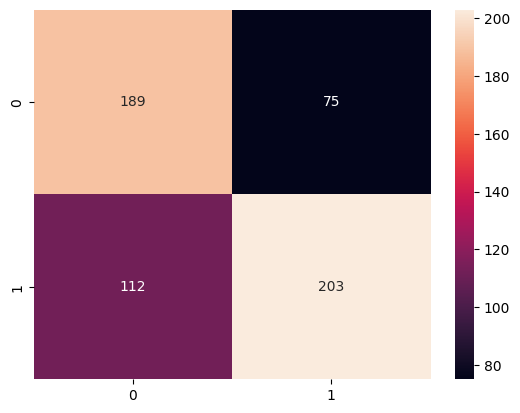

In [165]:
rfc = RandomForestClassifier(random_state = 42, n_jobs = -2)
parameters = {'max_depth':np.arange(3, 30, 5),
             'criterion':['gini', 'entropy'], 'min_samples_split': np.arange(3, 30, 5),
             'class_weight':['balanced', 'balanced_subsample']}
grid = GridSearchCV(rfc, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
rfc_pred = RandomForestClassifier(random_state = 42, max_depth = grid.best_params_['max_depth'],
                                 criterion = grid.best_params_['criterion'],
                                 min_samples_split = grid.best_params_['min_samples_split'],
                                 class_weight = grid.best_params_['class_weight'])
rfc_pred.fit(ohe_train_sel, y_train)
y_pred = rfc_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [166]:
y_pred = rfc_pred.predict(ohe_test_sel)
print(f'RFT accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'RFT precision: {metrics.precision_score(y_test, y_pred)}')
print(f'RFT recall: {metrics.recall_score(y_test, y_pred)}')
print(f'RFT f1: {f1_score(y_test, y_pred)}')

RFT accuracy: 0.6770293609671848
RFT precision: 0.6444444444444445
RFT recall: 0.7302158273381295
RFT f1: 0.684654300168634


## 6. FCALC

In [167]:
best_params = dict()
kf = KFold(n_splits=4, shuffle = True, random_state=42)
# ohe_train_sel = ohe_train.toarray()[:, features].astype(int)
for train, test in kf.split(ohe_train_sel):
    for alpha in np.arange(0, 10, 3):
        if str(alpha) not in list(best_params.keys()):
            best_params[str(alpha)]=[]
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel[train], y_train.astype(int)[train], method = 'standard', alpha = alpha)
        # bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train.toarray()[train], y_train[train], method = 'standard')
        bin_cls.predict(ohe_train_sel[test])
        f1 = f1_score(y_train.astype(int)[test], bin_cls.predictions, average = None)
        best_params[str(alpha)].append(f1)

print(best_params)

{'0': [array([0.52317881, 0.61497326]), array([0.        , 0.5483871 , 0.61157025]), array([0.        , 0.5       , 0.62857143]), array([0.        , 0.66229508, 0.7173913 ])], '3': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])], '6': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])], '9': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]}


In [168]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel, y_train, method = 'standard', alpha = 0)
y_pred = bin_cls.predict(ohe_test_sel)

In [169]:
bin_cls.predict(ohe_test_sel)
y_pred = bin_cls.predictions

<Axes: >

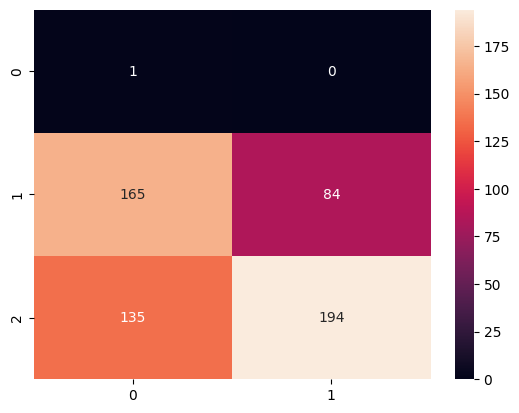

In [170]:
contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [171]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = None))

0.6200345423143351
[0.         0.6        0.63920923]


## Pattern Structure

In [172]:
best_params = dict()
kf = KFold(n_splits=4, shuffle = True, random_state=42)
# ohe_train_sel = ohe_train.toarray()[:, features].astype(int)
for train, test in kf.split(ohe_train_sel):
    pat_cls = fcalc.classifier.PatternBinaryClassifier(ohe_train_sel[train], y_train[train], categorical=np.arange(ohe_train_sel[test].shape[1]))
    pat_cls.predict(ohe_train_sel[test])
    f1 = f1_score(y_train[test], pat_cls.predictions, average = None)
    # best_params[str(alpha)].append(f1)
    print(f1)

# print(best_params)

[0.56626506 0.58139535]
[0.         0.61917808 0.54545455]
[0.52830189 0.57865169]
[0.         0.6741573  0.63091483]


In [173]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(ohe_train_sel, y_train, categorical=np.arange(ohe_train_sel.shape[1]))
pat_cls.predict(ohe_test_sel)

<Axes: >

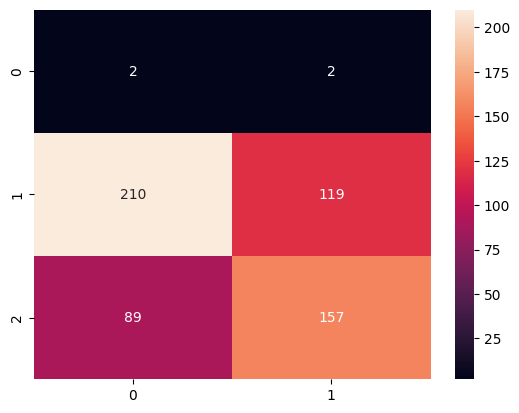

In [174]:
y_pred = pat_cls.predictions
contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [179]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = 'macro'))

0.6338514680483592
0.42196776929601354


# Aphasia_BCI

In [195]:
os.chdir("C:/Users/HP pavilion X360/Desktop/OSDA/big_homework")
from sklearn.decomposition import PCA

In [193]:
# subj = 'S001'
# epochs = mne.read_epochs('S001R01_epo.fif')
# events = epochs.events
# X = epochs.pick('eeg').get_data()

In [194]:
# X = X[:, :, :-1]
# X = X.reshape(X.shape[0], -1)
# X = np.array(X).squeeze()
# xy = pd.DataFrame(X)
# xy['target'] =  events[:,-1].flatten()

In [192]:
# X = X[:, :, :-1]
# X = X.reshape(X.shape[0], -1)
# X = np.array(X).squeeze()

# # Выделяем метки
# y = events[:,-1].flatten()
# xy.to_csv('aphasia_bci.csv')

In [202]:
data = pd.read_csv('aphasia_bci.csv')

In [199]:
y = (data['target'].values >=1).astype(int)
y

array([0, 0, 0, ..., 1, 0, 0])

In [203]:
data.drop(['Unnamed: 0', 'target'], axis = 1, inplace = True)
X = data

In [206]:
X.shape

(1017, 3500)

In [233]:
pca = PCA(80) # Количество компонент
X_pca = pca.fit_transform(X)

print('Shape transformations:')
print(f'X:\t{epochs.get_data().shape}\t->\t{epochs.get_data()[:, :, :-1].shape}\t  ->\t{X.shape}')
print(f'X_pca:\t{X.shape}\t->\t{X_pca.shape}')
print(f'y:\t{epochs.events.shape}\t->\t{epochs.events[:,-1].flatten().shape}')

Shape transformations:
X:	(1017, 2, 1751)	->	(1017, 2, 1750)	  ->	(1017, 3500)
X_pca:	(1017, 3500)	->	(1017, 80)
y:	(1017, 3)	->	(1017,)


In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit


In [235]:
split_parameters = {'n_splits': 1,
                    'test_size': 0.3, # 20% -- 10/50 повт. на тестирование
                                      # 80% -- 40/50 повт. на обучение
                    'random_state': 42}

# Делим данные сигнала (X) и соответствующих движений (y) на обучение и тестирование
for train_index, test_index in StratifiedShuffleSplit(**split_parameters).split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Вывод поясняющих метрик
print(f'Train:\t\tX: {X_train.shape} ,  y: {y_train.shape} ,  %: ~{100*y_train.shape[0]/y.shape[0]:.2f}')
print(f'Test:\t\tX: {X_test.shape} ,  y: {y_test.shape} ,  %: ~{100*y_test.shape[0]/y.shape[0]:.2f}')

Train:		X: (711, 80) ,  y: (711,) ,  %: ~69.91
Test:		X: (306, 80) ,  y: (306,) ,  %: ~30.09


In [11]:
# data = pd.read_csv('bci_aphasia.csv')

In [12]:
# data

In [13]:
# y = data.target
# data.drop('target', axis = 1, inplace = True)
# data.drop(['epoch', 'Unnamed: 0'], axis = 1, inplace = True)
# X = data

In [236]:
stsc = StandardScaler()
stsc.fit(X_train)
train = pd.DataFrame(stsc.transform(X_train))
test = pd.DataFrame(stsc.transform(X_test))

In [237]:
train.shape

(711, 80)

In [238]:
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', subsample=None).fit(train)
new_train = pd.DataFrame(kbins.transform(train), columns = pd.DataFrame(X_pca).columns)
# new_train['channel'] = X_train[:, -1]
new_test = pd.DataFrame(kbins.transform(test), columns = pd.DataFrame(X_pca).columns)
# new_test['channel'] = X_test[:, -1]

In [239]:
new_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,...,0.0,3.0,3.0,2.0,1.0,0.0,3.0,3.0,2.0,2.0
1,2.0,0.0,1.0,2.0,1.0,3.0,3.0,1.0,0.0,3.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
2,0.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,...,3.0,3.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0
3,0.0,1.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,1.0,...,1.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,3.0
4,0.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,...,2.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,3.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,...,1.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,3.0,2.0
707,0.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,0.0,...,1.0,0.0,3.0,3.0,1.0,3.0,2.0,0.0,2.0,3.0
708,3.0,0.0,3.0,2.0,3.0,0.0,1.0,2.0,3.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0
709,3.0,3.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,...,0.0,3.0,0.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0


In [240]:
ohe = OneHotEncoder(drop = 'first').fit(new_train)
ohe_train = ohe.transform(new_train)
ohe_test = ohe.transform(new_test)

In [241]:
ohe_test.toarray().shape, ohe_train.toarray().shape

((306, 240), (711, 240))

In [242]:
pd.DataFrame(y_train).value_counts()

0    573
1    138
Name: count, dtype: int64

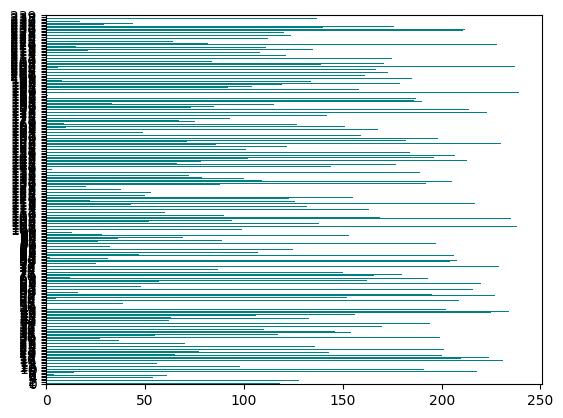

In [243]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(ohe_train.toarray(), y_train)

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks)
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [244]:
ohe_train_sel = ohe_train[:, feature_importances>40].toarray().astype(int)
ohe_test_sel = ohe_test[:, feature_importances>40].toarray().astype(int)

In [245]:
ohe_train_sel.shape

(711, 199)

## 1. KNN

Best params: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}


<Axes: >

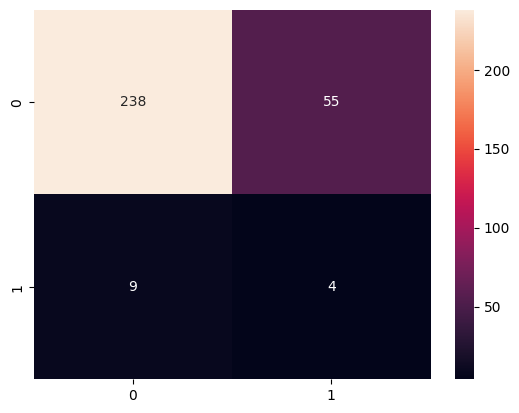

In [246]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1, 30, 1), 'metric': ('euclidean', 'manhattan'),
             'weights':('uniform', 'distance')}
grid = GridSearchCV(knn, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
knn_pred = KNeighborsClassifier(metric = grid.best_params_['metric'], n_neighbors = grid.best_params_['n_neighbors'],
                               weights = grid.best_params_['weights'])
knn_pred.fit(ohe_train_sel, y_train)

y_pred = knn_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [247]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([247,  59], dtype=int64))

In [248]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([573, 138], dtype=int64))

In [249]:
print(f'Accuracy: {metrics.accuracy_score(y_pred = y_pred, y_true = 1*(y_test==1))}')
print(f'Precision: {metrics.precision_score(y_pred = y_pred, y_true = 1*(y_test==1))}')
print(f'recall: {metrics.recall_score(y_pred = y_pred, y_true = 1*(y_test==1))}')
print(f'f1: {metrics.f1_score(y_pred = y_pred, y_true = 1*(y_test==1))}')

Accuracy: 0.7908496732026143
Precision: 0.3076923076923077
recall: 0.06779661016949153
f1: 0.1111111111111111


## 2. Logistic Regression

Best params: {'C': 7.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


<Axes: >

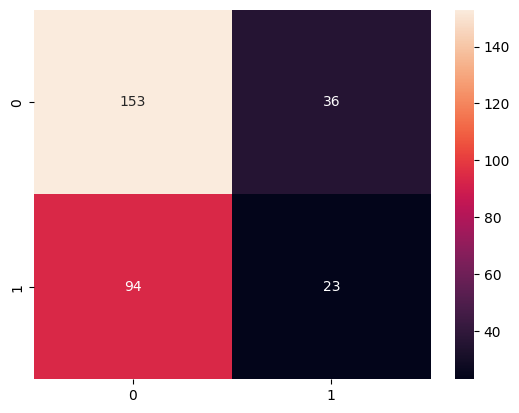

In [250]:
lr = LogisticRegression(max_iter = 10000, random_state = 42)
parameters = {'C':np.arange(0.1, 10, 1), 'penalty': ('l2', 'l1'),
             'class_weight': ['balanced'],
             'solver' : ['saga', 'liblinear']}
grid = GridSearchCV(lr, parameters, cv = 4, n_jobs = -2)

grid.fit(ohe_train_sel, 1*(y_train==1))
print(f'Best params: {grid.best_params_}')
    
lr_pred = LogisticRegression(C = grid.best_params_['C'], penalty = grid.best_params_['penalty'],
                               class_weight = grid.best_params_['class_weight'],
                            solver = grid.best_params_['solver'])
lr_pred.fit(ohe_train_sel, 1*(y_train==1))

y_pred = lr_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,
                                                      1*(y_test==1))
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [251]:
print(f'Logistic Regression accuracy: {metrics.accuracy_score(1*(y_test==1), y_pred)}')
print(f'Logistic Regression precision: {metrics.precision_score(1*(y_test==1), y_pred)}')
print(f'Logistic Regression recall: {metrics.recall_score(1*(y_test==1), y_pred)}')
print(f'Logistic Regression f1: {f1_score(1*(y_test==1), y_pred)}')

Logistic Regression accuracy: 0.5751633986928104
Logistic Regression precision: 0.19658119658119658
Logistic Regression recall: 0.3898305084745763
Logistic Regression f1: 0.26136363636363635


In [252]:
# # lr_pred = LogisticRegression(max_iter = 10000, random_state = 42)
# bfs = SequentialFeatureSelector(lr_pred, k_features='best', forward = False, n_jobs=-2)
# bfs.fit(ohe_train.toarray().astype(int), y_train)
# features = list(bfs.k_feature_names_)
# features = list(map(int, features))
# lr_pred.fit(ohe_train.toarray()[:, features].astype(int), y_train)
# y_pred = lr_pred.predict(ohe_test.toarray()[:, features].astype(int))

In [253]:
# print(f'Logistic Regression accuracy: {metrics.accuracy_score(y_test, y_pred)}')
# print(f'Logistic Regression precision: {metrics.precision_score(y_test, y_pred)}')
# print(f'Logistic Regression recall: {metrics.recall_score(y_test, y_pred)}')
# print(f'Logistic Regression f1: {f1_score(y_test, y_pred)}')

## 3.a XGBoost

In [254]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=500,class_sep=0.7)

data_dmatrix = xgb.DMatrix(data=ohe_train_sel,label=(y_train==1)*1)
params = {'objective':'binary:logistic','eval_metric':'logloss',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'logloss',seed=42) 
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.494801,0.009598,0.496044,0.033270
1,0.494520,0.009541,0.495727,0.033556
2,0.494232,0.009455,0.495468,0.033603
3,0.493882,0.009396,0.495418,0.033758
4,0.493558,0.009448,0.495501,0.034019
5,0.493206,0.009464,0.495333,0.034245
6,0.492906,0.009447,0.495615,0.034524
7,0.492717,0.009427,0.495773,0.034097
8,0.492388,0.009298,0.495856,0.033858
9,0.492153,0.009275,0.495751,0.034106


In [255]:
grid = pd.DataFrame({'eta':[0.01,0.3,0.5]*9,
                     'gamma':[0, 0.1, 1]*9,
                     'subsample':np.repeat([0.5, .6, .7],9)})

In [256]:
def fit(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'logloss',
              'eta':x[0],
              'subsample':x[1],
             'lambda' : '1'}
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, 
    nfold=5, metrics = 'logloss',seed=42)
    return xgb_cv[-1:].values[0]

grid[['train-logloss-mean','train-logloss-std',
'test-logloss-mean','test-logloss-std']] = grid.apply(fit,axis=1,result_type='expand')
grid

C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\2668654758.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'eta':x[0],
C:\Users\HP pavilion X360\AppData\Local\Temp\ipykernel_9600\2668654758.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'subsample':x[1],


,eta,gamma,subsample,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.01,0.0,0.5,0.495227,0.009589,0.496252,0.033308
1,0.30,0.1,0.5,0.489433,0.019703,0.556872,0.048334
2,0.50,1.0,0.5,0.095650,0.003555,0.606220,0.079479
3,0.01,0.0,0.5,0.495227,0.009589,0.496252,0.033308
4,0.30,0.1,0.5,0.489433,0.019703,0.556872,0.048334
5,0.50,1.0,0.5,0.095650,0.003555,0.606220,0.079479
6,0.01,0.0,0.5,0.495227,0.009589,0.496252,0.033308
7,0.30,0.1,0.5,0.489433,0.019703,0.556872,0.048334
8,0.50,1.0,0.5,0.095650,0.003555,0.606220,0.079479
9,0.01,0.0,0.6,0.495227,0.009589,0.496252,0.033308


<Axes: >

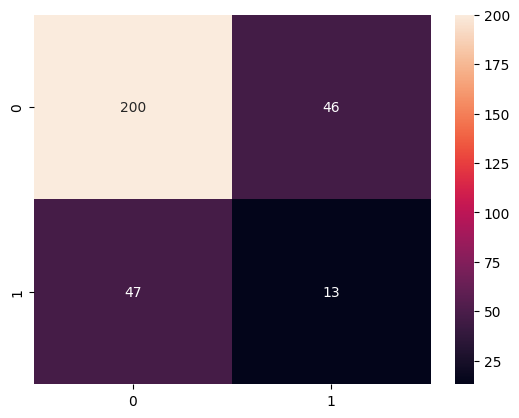

In [257]:
xgb_reg = xgb.XGBRegressor(objective='binary:logistic',
                           eval_metric = 'logloss',
                           eta = 0.5,
                           subsample = 0.6,
                          gamma =1)

xgb_reg.fit(ohe_train_sel, (y_train==1)*1) 
y_pred = xgb_reg.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred >=.3,
                                                      (y_test==1)*1)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [271]:
y_pred = xgb_reg.predict(ohe_test_sel) > .3
print(f'NB accuracy: {metrics.accuracy_score((y_test >= 1), y_pred)}')
print(f'NB precision: {metrics.precision_score((y_test >= 1), y_pred, average = None)}')
print(f'NB recall: {metrics.recall_score((y_test >= 1), y_pred, average = None)}')
print(f'NB f1: {f1_score(y_test, y_pred, average = "macro")}')


NB accuracy: 0.696078431372549
NB precision: [0.81300813 0.21666667]
NB recall: [0.8097166  0.22033898]
NB f1: 0.5149232106635757


## 4. Random Forest

Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 13}


<Axes: >

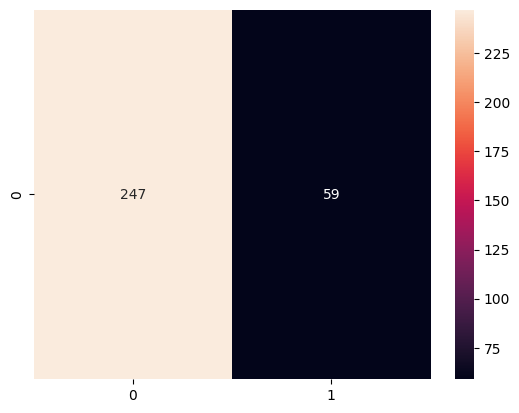

In [288]:
rfc = RandomForestClassifier(random_state = 42, n_jobs = -2)
parameters = {'max_depth':np.arange(3, 30, 5),
             'criterion':['gini', 'entropy'], 'min_samples_split': np.arange(3, 30, 5),
             'class_weight':['balanced', 'balanced_subsample']}
grid = GridSearchCV(rfc, parameters, cv = 4)

grid.fit(ohe_train_sel, y_train)
print(f'Best params: {grid.best_params_}')
rfc_pred = RandomForestClassifier(random_state = 42, max_depth = grid.best_params_['max_depth'],
                                 criterion = grid.best_params_['criterion'],
                                 min_samples_split = grid.best_params_['min_samples_split'],
                                 class_weight = grid.best_params_['class_weight'])
rfc_pred.fit(ohe_train_sel, y_train)
y_pred = rfc_pred.predict(ohe_test_sel)

contingency_matrix = metrics.cluster.contingency_matrix(y_pred,y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [289]:
# y_pred = rfc_pred.predict(ohe_test_sel)
print(f'RFT accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'RFT precision: {metrics.precision_score(y_test, y_pred, average = None)}')
print(f'RFT recall: {metrics.recall_score(y_test, y_pred, average = None)}')
print(f'RFT f1: {f1_score(y_test, y_pred, average = "macro")}')

RFT accuracy: 0.8071895424836601
RFT precision: [0.80718954 0.        ]
RFT recall: [1. 0.]
RFT f1: 0.44665461121157324


C:\Users\HP pavilion X360\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. FCALC

In [304]:
best_params = dict()
kf = KFold(n_splits=4, shuffle = True, random_state=42)
for train, test in kf.split(ohe_train_sel):
    for alpha in [0, 1]:
        if str(alpha) not in list(best_params.keys()):
            best_params[str(alpha)]=[]
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel[train], (y_train>=1).astype(int)[train], method = 's', alpha = alpha)
        # bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train.toarray()[train], y_train[train], method = 'standard')
        bin_cls.predict(ohe_train_sel[test])
        f1 = f1_score(y_train[test], bin_cls.predictions, average = None)
        best_params[str(alpha)].append(f1)

print(best_params)

{'0': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])], '1': [array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]}


In [305]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(ohe_train_sel, y_train, method = 'ratio-support', alpha = 0)
# y_pred = bin_cls.predict(ohe_test.toarray().astype(int))

In [306]:
bin_cls.predict(ohe_test_sel)
y_pred = bin_cls.predictions

<Axes: >

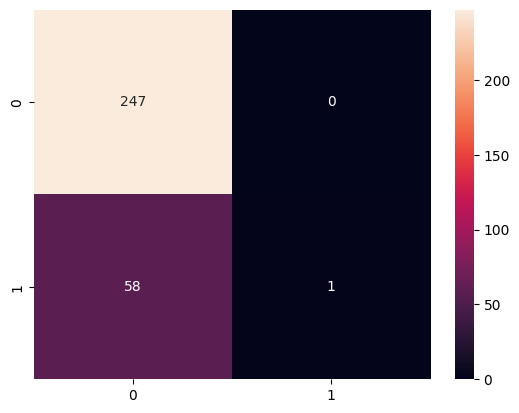

In [313]:
contingency_matrix = metrics.cluster.contingency_matrix(y_test, y_pred)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [314]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = 'macro'))

0.0
0.0


## Pattern Structure

In [315]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(ohe_train_sel, y_train, 
                                             categorical=np.arange(ohe_train_sel.shape[1]))

In [316]:
pat_cls.predict(ohe_test_sel)

<Axes: >

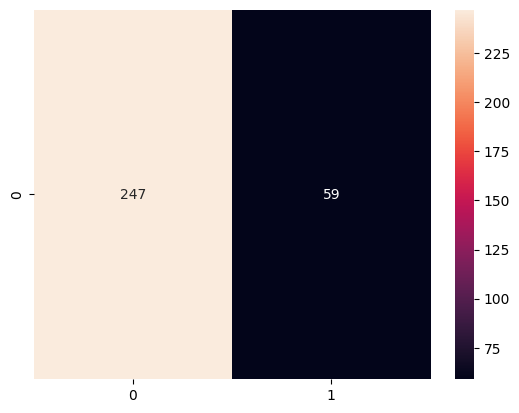

In [317]:
y_pred = pat_cls.predictions
contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_test)
snx.heatmap(contingency_matrix, annot = True, fmt='')

In [303]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = None))

0.0
[0. 0. 0.]
